# Analysis of the SPEECHCOMMANDS Dataset
This notebook contains a detailed statistical analysis of the SPEECHCOMMANDS dataset using PyTorch.

In [1]:
import torch
import torchaudio
from torchaudio.datasets import SPEECHCOMMANDS
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
dataset = SPEECHCOMMANDS(root='./', download=True)

# Display the dataset length
print(f'Total number of samples: {len(dataset)}')

100%|██████████| 2.26G/2.26G [02:14<00:00, 18.0MB/s]


Total number of samples: 105829


## Class Distribution

backward: 1664 samples
bed: 2014 samples
bird: 2064 samples
cat: 2031 samples
dog: 2128 samples
down: 3917 samples
eight: 3787 samples
five: 4052 samples
follow: 1579 samples
forward: 1557 samples
four: 3728 samples
go: 3880 samples
happy: 2054 samples
house: 2113 samples
learn: 1575 samples
left: 3801 samples
marvin: 2100 samples
nine: 3934 samples
no: 3941 samples
off: 3745 samples
on: 3845 samples
one: 3890 samples
right: 3778 samples
seven: 3998 samples
sheila: 2022 samples
six: 3860 samples
stop: 3872 samples
three: 3727 samples
tree: 1759 samples
two: 3880 samples
up: 3723 samples
visual: 1592 samples
wow: 2123 samples
yes: 4044 samples
zero: 4052 samples


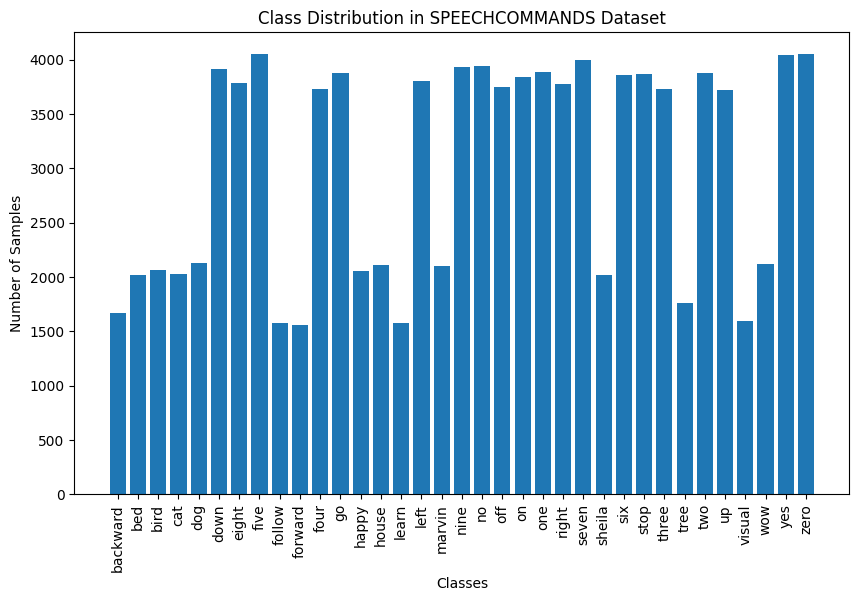

In [2]:
from collections import Counter

# Get class distribution
labels = [data[2] for data in dataset]
class_distribution = Counter(labels)

# Display the distribution
for label, count in class_distribution.items():
    print(f'{label}: {count} samples')

# Plot the class distribution
plt.figure(figsize=(10, 6))
plt.bar(class_distribution.keys(), class_distribution.values())
plt.xticks(rotation=90)
plt.title('Class Distribution in SPEECHCOMMANDS Dataset')
plt.xlabel('Classes')
plt.ylabel('Number of Samples')
plt.show()

## Speaker Representation

Number of unique speakers: 2618


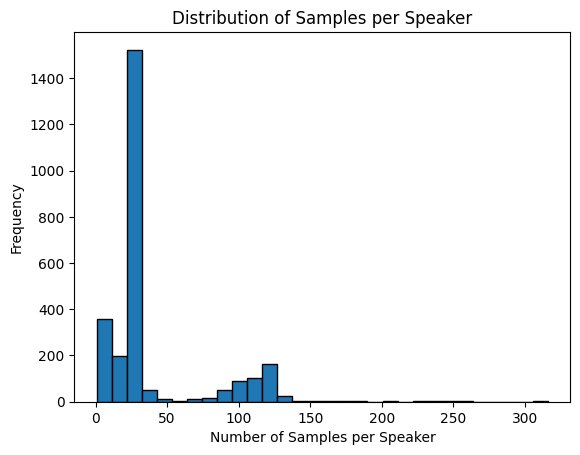

In [3]:
# Get speaker distribution
speakers = [data[3] for data in dataset]
speaker_distribution = Counter(speakers)

# Display number of unique speakers
print(f'Number of unique speakers: {len(speaker_distribution)}')

# Plot speaker distribution
speaker_counts = list(speaker_distribution.values())
plt.hist(speaker_counts, bins=30, edgecolor='black')
plt.title('Distribution of Samples per Speaker')
plt.xlabel('Number of Samples per Speaker')
plt.ylabel('Frequency')
plt.show()

## Duration Analysis

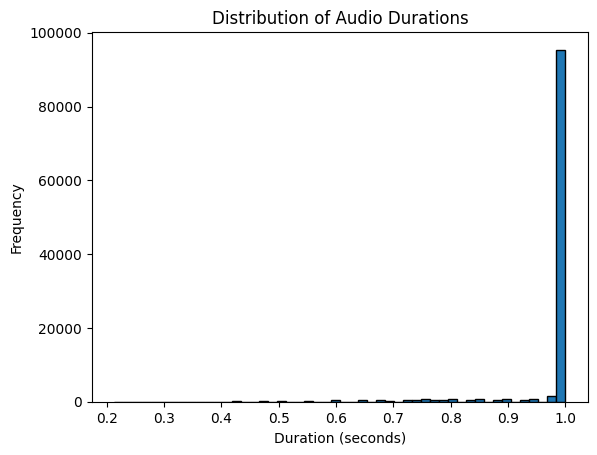

Mean duration: 0.98 seconds
Standard deviation of duration: 0.07 seconds


In [4]:
# Analyze the duration of audio samples
durations = []

for waveform, sample_rate, label, speaker_id, utterance_number in dataset:
    duration = waveform.shape[1] / sample_rate
    durations.append(duration)

# Plot the duration distribution
plt.hist(durations, bins=50, edgecolor='black')
plt.title('Distribution of Audio Durations')
plt.xlabel('Duration (seconds)')
plt.ylabel('Frequency')
plt.show()

# Print statistics
print(f'Mean duration: {np.mean(durations):.2f} seconds')
print(f'Standard deviation of duration: {np.std(durations):.2f} seconds')

## Background Noise Analysis

In [5]:
# Checking for background noise samples
background_samples = [label for label in labels if 'background' in label]

print(f'Number of background noise samples: {len(background_samples)}')

Number of background noise samples: 0
